# EDSA - Climate Change Belief Analysis 2021
### Team TS5 Classification

<div align="center" style="width: 1000px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/CPNMorgan/Team_TS5_JHB_Classification/main/climat change.jpg"
     alt="Titanic"
     style="float: center; padding-bottom=0.5em"
     width=1000px/>

</div>

# Challange Description

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

# Introduction

# Importing Packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#from plotly import graph_objs as go
import seaborn as sns
from plotly import graph_objs as go

#nlp
import string
import re    #for regex
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import TweetTokenizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union
from wordcloud import WordCloud 
from collections import Counter

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')

## First look into data

In [3]:
# Merging both the data sets
''''concat_df = train_df.append(test_df, 
                             ignore_index=True,
                             sort=False)
concat_df.head(3)'''

"'concat_df = train_df.append(test_df, \n                             ignore_index=True,\n                             sort=False)\nconcat_df.head(3)"

In [4]:
#len(concat_df)

In [5]:
#check the shape of the data
train_df.shape, test_df.shape

((15819, 3), (10546, 2))

In [6]:
#unique sentiments
train_df['sentiment'].unique()

array([ 1,  2,  0, -1])

In [7]:
train_df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [8]:
train_df['sentiment'].describe()

count    15819.000000
mean         0.917504
std          0.836537
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: sentiment, dtype: float64

In [9]:
#check for nulls
train_df.isnull().sum(), test_df.isnull().sum()

(sentiment    0
 message      0
 tweetid      0
 dtype: int64,
 message    0
 tweetid    0
 dtype: int64)

In [10]:
test_df.isnull().sum()

message    0
tweetid    0
dtype: int64

In [11]:
#concat_df['sentiment'].describe()

In [12]:
#describe the data
#print(concat_df['sentiment'].unique())

In [13]:
#concat_df.isnull()

## Data cleaning:
- The EDA text cleaning function executes the following steps:
  - lowercase all words
  - Remove noise such as punctuation and URLs  
  

In [14]:
# function that takes a tweet message and a character e.g @ and remove the character from the sentence
# Returns the sentence without the character
# Define the function to remove the punctuation
def remove_punctuations(msg):
    msg = str(msg).lower()
    msg = re.sub('\[.*?\]', '', msg)
    msg = re.sub('https?://\S+|www\.\S+', '', msg)
    msg = re.sub('<.*?>+', '', msg)
    msg = re.sub('[%s]' % re.escape(string.punctuation), '', msg)
    msg = re.sub('\n', '', msg)
    msg = re.sub('\w*\d\w*', '', msg)
    msg = re.sub('rt','',msg)
    return msg


In [15]:
train_df['clean_message'] = train_df['message'].apply(lambda x:remove_punctuations(x))
test_df['clean_message'] = test_df['message'].apply(lambda x:remove_punctuations(x))
train_df.tail(15)

sentiment                                            message  tweetid  \
15804          1  RT @cathdweeb: me with full knowledge of globa...   386076   
15805          2  RT @GrindTV: New head of EPA says climate chan...   830383   
15806         -1  RT @HerberMp: @sness5561_ness Al Gore is a idi...   213863   
15807          1  #scottpruit climate change comments would be l...   447067   
15808          0  RT @ThePowersThatBe: Now if she could only be ...   127777   
15809          2  The quest to capture and store carbon — and sl...   705048   
15810          0  This global warming so late in the season is p...   572819   
15811          1  RT @StephenSchlegel: she's thinking about how ...   426353   
15812          1  RT @SierraClub: 2016: hottest year in history....   989478   
15813          1  RT @thinkprogress: EPA head falsely claims car...   442853   
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

                                           clean_message  
15804   cathdweeb me with full knowledge of global wa...  
15805   grindtv new head of epa says climate change n...  
15806   herbermp  al gore is a idiot he thinks climat...  
15807  scottpruit climate change comments would be li...  
15808   thepowersthatbe now if she could only be conv...  
15809  the quest to capture and store carbon — and sl...  
15810  this global warming so late in the season is p...  
15811   stephenschlegel shes thinking about how shes ...  
15812   sierraclub  hottest year in history also in  ...  
15813   thinkprogress epa head falsely claims carbon ...  
15814   ezlusztig they took down the material on glob...  
15815   washingtonpost how climate change could be br...  
15816  notiven  nytimesworld what does trump actually...  
15817    hey liberals the climate change crap is a ho...  
15818   chetcannon kueichenwalds climate change equat...

### Removing Stop Words

In [16]:
train_df['clean_message'] = train_df['clean_message'].apply(lambda x: ' '.join([a for a in x.split() if len(a)>3]))
test_df['clean_message'] = test_df['clean_message'].apply(lambda x: ' '.join([a for a in x.split() if len(a)>3]))

In [17]:
train_df.tail()

sentiment                                            message  tweetid  \
15814          1  RT @ezlusztig: They took down the material on ...    22001   
15815          2  RT @washingtonpost: How climate change could b...    17856   
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248   
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

                                           clean_message  
15814  ezlusztig they took down material global warmi...  
15815  washingtonpost climate change could breaking r...  
15816  notiven nytimesworld what does trump actually ...  
15817  liberals climate change crap hoax that ties cl...  
15818  chetcannon kueichenwalds climate change equati...

## Exploratory Data Analysis (EDA)

 Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

In [18]:
#copy_df = train_df.copy()
# Labeling the target
#train_df['sentiment'] = [['Negative(-1)', 'Neutral(0)', 'Positive(1)', 'News(2)'][x+1] for x in train_df['sentiment']]
#train_df.head()

#### Discreption of Sentiments:
- 2 News: the tweet links to factual news about climate change
- 1 Positive: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Negative: the tweet does not believe in man-made climate change

In [19]:
dist = train_df.groupby('sentiment').count()['clean_message'].reset_index().sort_values(by='clean_message',ascending=True)
dist.style.background_gradient(cmap='Greens')

#### Count of words per sentiment

<AxesSubplot:xlabel='sentiment', ylabel='count'>

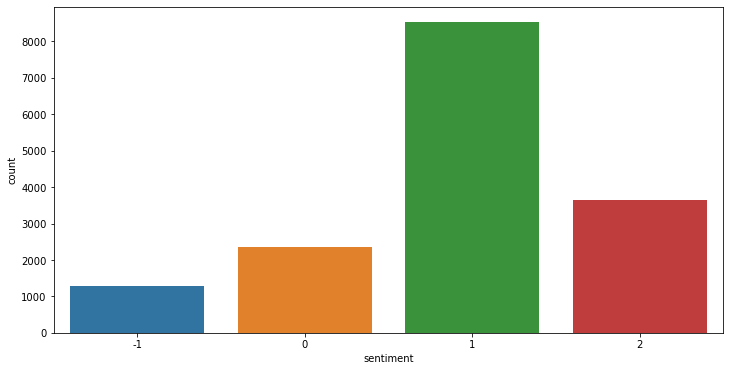

In [20]:
labels = []
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train_df)

### Observations
- The graph a bove shows that the words in the positive sentiment are higher compare to others, with 8000 words, were by the rest are below 4000


## Funnel chart to get more insight from sentiments

In [21]:
fig = go.Figure(go.Funnelarea(
    text =train_df.sentiment,
    values = dist.clean_message,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()


### Observation
- Negative(-1) Sentiment shows the less of counted words with the percentage of 8.19
- Neutral(0) shows 14.9 percents of counted words
- News(2) shows 23 percents of counted words
- And Positive comments shows the highest percentage of 53.9 of counted words

## checking average length of each sentiment catergory

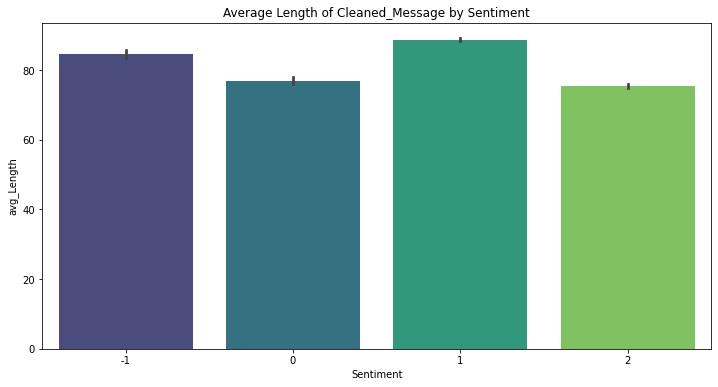

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='sentiment', y=train_df['clean_message'].apply(len) ,data = train_df, palette='viridis')
plt.ylabel('avg_Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Cleaned_Message by Sentiment')
plt.show()

### Observations:
 -

In [23]:
tweetid = train_df['tweetid']
#df_test = df_test.drop('Index', axis = 1)

len(tweetid)

15819

## Most Common words in our Target-Selected Message

In [24]:
train_df['new_lis'] = train_df['clean_message'].apply(lambda x:str(x).split())
words = Counter([item for sublist in train_df['new_lis'] for item in sublist])
new = pd.DataFrame(words.most_common(10))
new.columns = ['Common_words','count']
new.style.background_gradient(cmap='Reds')

In [25]:
import plotly.express as px
fig = px.bar(new, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

### Observations:
 -

## Most common words Sentiments Wise

In [26]:
Positive = train_df[train_df['sentiment']==1]
Negative = train_df[train_df['sentiment']==-1]
Neutral = train_df[train_df['sentiment']==0]
News = train_df[train_df['sentiment']==2]


### Most common positive(1) words

In [27]:
#MosT common positive words
top = Counter([item for sublist in Positive['new_lis'] for item in sublist])
positive_w = pd.DataFrame(top.most_common(10))
positive_w.columns = ['Common_words','count']
positive_w.style.background_gradient(cmap='Greens')

In [28]:
fig = px.bar(positive_w, x="count", y="Common_words", title='Most Commmon Positive(1) Words', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

### Observations:
 -

### Most common negative words

In [29]:

top = Counter([item for sublist in Negative['new_lis'] for item in sublist])
negative = pd.DataFrame(top.most_common(10))
negative = negative.iloc[1:,:]
negative.columns = ['Common_words','count']
negative.style.background_gradient(cmap='Reds')

In [30]:
fig = px.bar(negative, x="count", y="Common_words", title='Most Commmon Negative(-1) Words', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

### Observation:
 -

### Most common neutral(0) words

In [31]:
top = Counter([item for sublist in Neutral['new_lis'] for item in sublist])
neutral = pd.DataFrame(top.most_common(10))
neutral = neutral.iloc[1:,:]
neutral.columns = ['Common_words','count']
neutral.style.background_gradient(cmap='Blues')

In [32]:
fig = px.bar(neutral, x="count", y="Common_words", title='Most Commmon Neutral(0) Words', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

### Observation:
 -

### Most common news(2) words

In [33]:
top = Counter([item for sublist in News['new_lis'] for item in sublist])
news = pd.DataFrame(top.most_common(10))
news = news.iloc[1:,:]
news.columns = ['Common_words','count']
news.style.background_gradient(cmap='Reds')

In [34]:
fig = px.bar(news, x="count", y="Common_words", title='Most Commmon Neutral(0) Words', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

### Observation:
 -

### Counting number of Emojis used in the texts

In [36]:
!pip install emoji
import emoji
emojis_df=[]
for string in test_df['clean_message']:
    my_str = str(string)
    for each in my_str:
        if each in emoji.UNICODE_EMOJI['en'].keys():
            emojis_df.append(each)
freq = (Counter(i for sub in emojis_df for i in set(sub))) 
sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True)

Defaulting to user installation because normal site-packages is not writeable
  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)


In [37]:
print(sort_orders)

[('😂', 11), ('™', 9), ('😍', 7), ('🏽', 7), ('👇', 6), ('❄', 5), ('♥', 5), ('❓', 5), ('🏻', 3), ('▶', 3), ('⬆', 3), ('😊', 3), ('❌', 3), ('😫', 3), ('♂', 3), ('©', 2), ('➡', 2), ('💯', 2), ('☁', 2), ('🔥', 2), ('😁', 2), ('🤷', 1), ('♀', 1), ('🐼', 1), ('🐻', 1), ('🐝', 1), ('🐠', 1), ('🐚', 1), ('🌷', 1), ('🍀', 1), ('🌎', 1), ('☎', 1), ('🎉', 1), ('🤔', 1), ('⚡', 1), ('👀', 1), ('👊', 1), ('🖕', 1), ('👌', 1), ('😟', 1), ('💩', 1), ('⚖', 1), ('☀', 1), ('🤦', 1), ('🏼', 1), ('🐸', 1), ('☕', 1), ('🔀', 1), ('‼', 1), ('😳', 1), ('🙈', 1), ('😉', 1)]


### Observation:
- The most common emoji is the 'face with tears of joy' is an emoji featuring a jovial face laughing, while also crying out tears
- We have other emjis that illustrate the impacts of global warmaing on weather and climate change, e.g 'earth,fire,flowers and snowflake'

### WordCloud of most common positive words used.


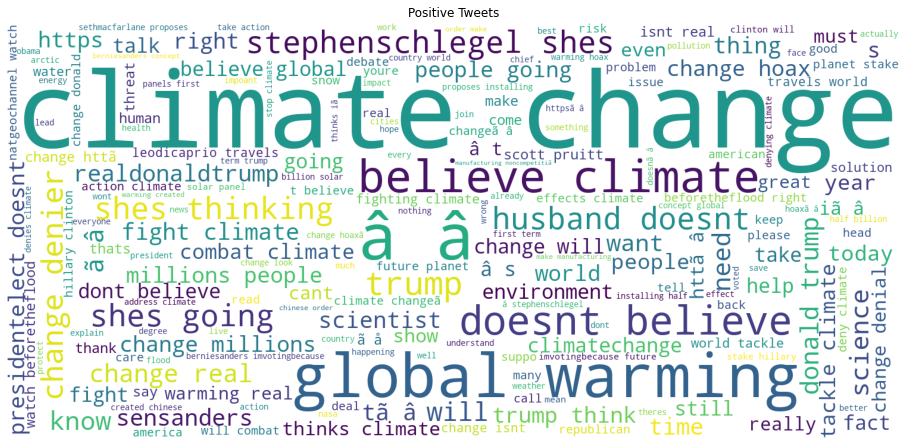

In [38]:
wordcloud = WordCloud(max_font_size=250,background_color='white', width=1500, height=700).generate(' '.join(Positive[Positive['sentiment'] == 1]
                                          ['clean_message']))
plt.figure( figsize=(16,10))
plt.imshow(wordcloud)
plt.title('Positive Tweets')
plt.axis("off")
plt.show()

### Observations:
 -

### WordCloud of most common negative words used

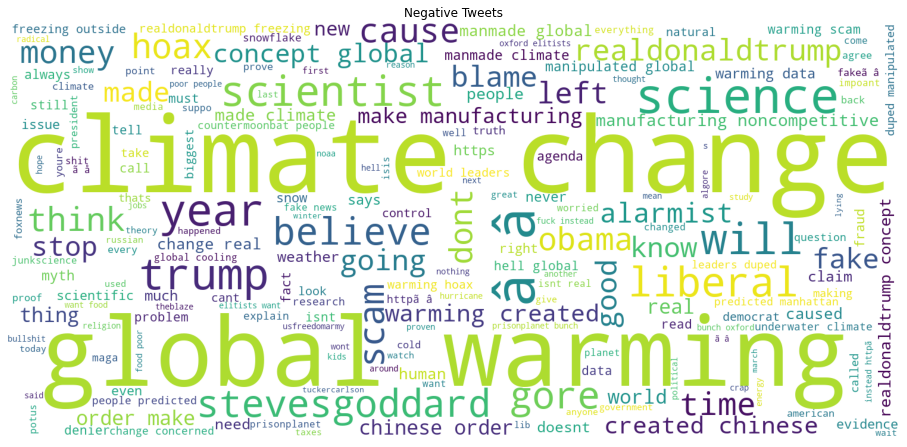

In [39]:
wordcloud = WordCloud(max_font_size=250,background_color='white', width=1500, height=700).generate(' '.join(Negative[Negative['sentiment'] == -1]
                                          ['clean_message']))
plt.figure( figsize=(16,10))
plt.imshow(wordcloud)
plt.title('Negative Tweets')
plt.axis("off")
plt.show()

### Observations:
 -

### WordCloud of most common neutral words used

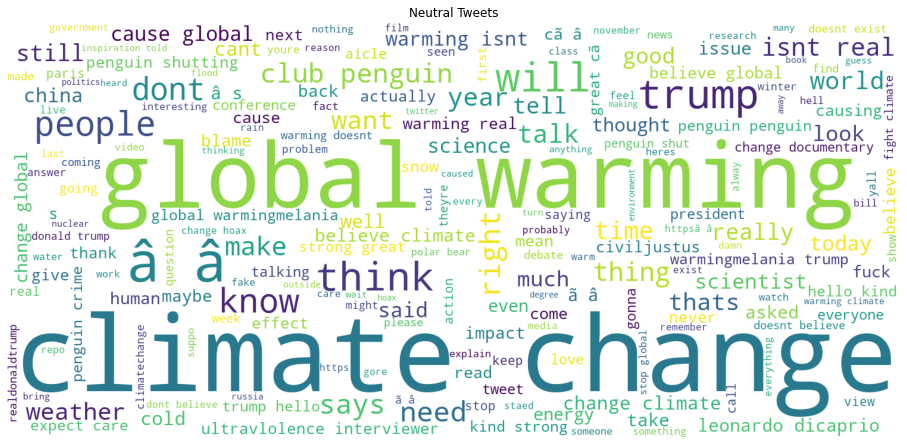

In [40]:
wordcloud = WordCloud(max_font_size=250,background_color='white', width=1500, height=700).generate(' '.join(Neutral[Neutral['sentiment'] == 0]
                                          ['clean_message']))
plt.figure( figsize=(16,10))
plt.imshow(wordcloud)
plt.title('Neutral Tweets')
plt.axis("off")
plt.show()

### Observations:
 -

### WordCloud of most common neutral words used

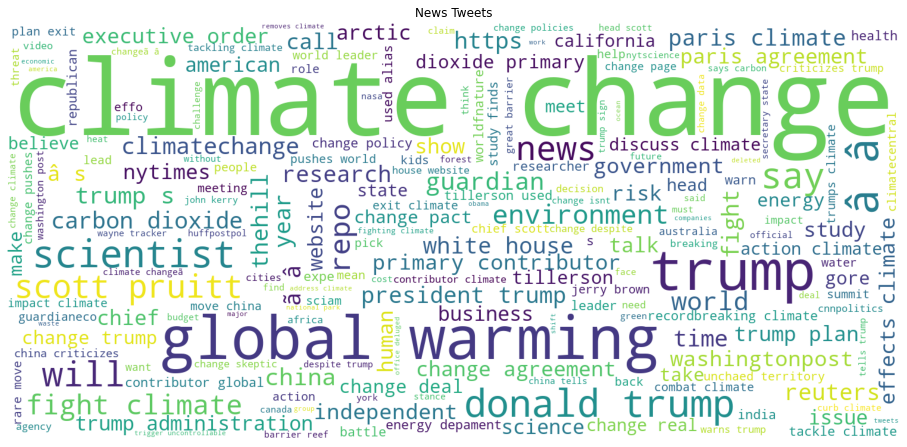

In [41]:
wordcloud = WordCloud(max_font_size=250,background_color='white', width=1500, height=700).generate(' '.join(News[News['sentiment'] == 2]
                                          ['clean_message']))
plt.figure( figsize=(16,10))
plt.imshow(wordcloud)
plt.title('News Tweets')
plt.axis("off")
plt.show()

### WordCloud of most common words used 'Overall'
- Wordcloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

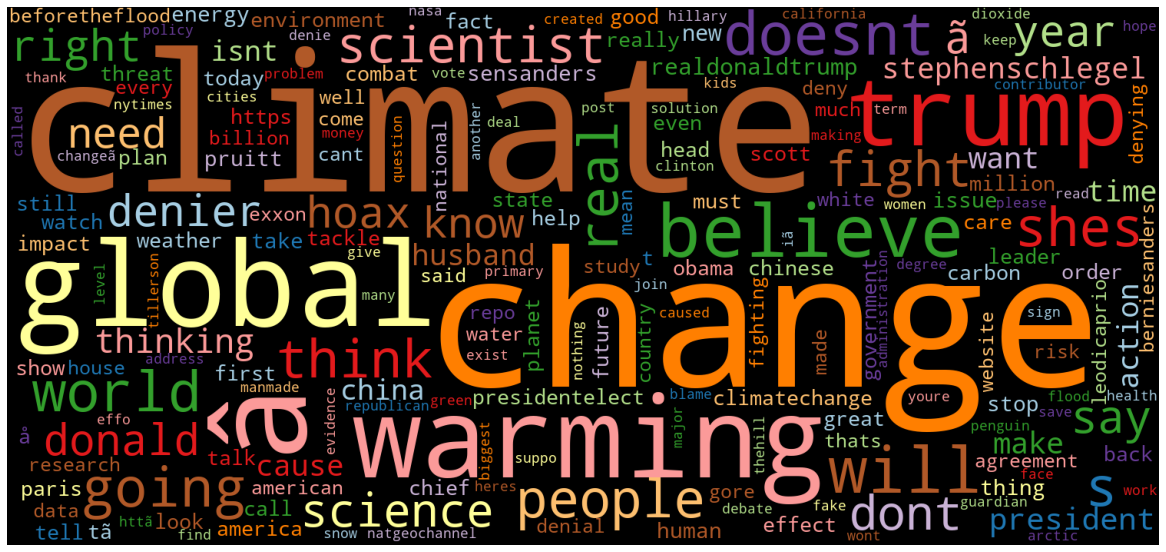

In [42]:
train_msg = " ".join(tweet for tweet in train_df.clean_message)
train_wordcloud = WordCloud(max_font_size=250,
                            background_color="black",
                            width=1500,
                            height=700,
                            collocations=False,
                            colormap='Paired').generate(train_msg)
plt.figure(figsize=(16, 10))
plt.imshow(train_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Observation:
 - 

## Balancing Data

In [43]:

# Separate minority and majority classes
majority_sentiment = train_df[train_df['sentiment']== 1]
minority_sentiment_0 = train_df[train_df['sentiment']== 0]
minority_sentiment_2 = train_df[train_df['sentiment']== 2]
minority_sentiment_neg1 = train_df[train_df['sentiment'] == -1]

In [44]:

# Upsample minority
minority_sentiment_0_minority = resample(minority_sentiment_0,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(majority_sentiment), # match number in minority class
                          random_state=42) # reproducible results

minority_sentiment_2_minority = resample(minority_sentiment_2,
                                         replace = True,
                                         n_samples=len(majority_sentiment),
                                         random_state=42)

minority_sentiment_neg1_minority = resample(minority_sentiment_neg1,
                                   replace=True,
                                   n_samples=len(majority_sentiment),
                                   random_state=42)

# Combine upsampled minority class with majority class
train_df = pd.concat([majority_sentiment, minority_sentiment_0_minority,minority_sentiment_2_minority,minority_sentiment_neg1_minority])

# Check new class counts
train_df['sentiment'].value_counts()

 0    8530
 1    8530
 2    8530
-1    8530
Name: sentiment, dtype: int64

In [45]:
# Show the table of balanced data in clean_text from each language Id
dist = train_df.groupby('sentiment').count()['clean_message'].reset_index().sort_values(by='clean_message',ascending=True)
dist

sentiment  clean_message
0         -1           8530
1          0           8530
2          1           8530
3          2           8530

## Data Preprosessing

### Train (Validation) Test Split

In [46]:
X = train_df['clean_message'].values
y = train_df['sentiment'].values

In [47]:
# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=42)

# Classification Models 
[Back to Table of Contents](#toc)

In [48]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
clf_dict = [LinearSVC(random_state=42), KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(max_depth=5),
                        RandomForestClassifier(max_depth=5, n_estimators=10,
                        max_features=1), ComplementNB(),AdaBoostClassifier()
                         ]

In [49]:
def modeling(clf_dict, X_train, y_train, X_val, y_val):

    models = {}
    for clf in clf_dict:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))),('clf', clf)])
        
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)

        # Output for each model
        models[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,predictions,average='macro'),
            'F1-Mccuracy': metrics.f1_score(y_val, predictions,average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,predictions,average='weighted')}

    return pd.DataFrame.from_dict(models, orient='index')

In [50]:
# Displaying all the models
classi = modeling(clf_dict, X_train, y_train, X_val, y_val)
display_df = classi.sort_values('F1-Macro', ascending=False)
display_df

F1-Macro  F1-Mccuracy  F1-Weighted
LinearSVC               0.932707     0.934349     0.932876
ComplementNB            0.873340     0.880715     0.873554
KNeighborsClassifier    0.766472     0.779894     0.766696
AdaBoostClassifier      0.441960     0.450176     0.441296
DecisionTreeClassifier  0.341568     0.364009     0.340960
RandomForestClassifier  0.110669     0.254689     0.110759

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=42)

In [52]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 11]}  # parameter grid

pipe_l = Pipeline([('tfidf', TfidfVectorizer(min_df=2, max_df=0.9, ngram_range=(1, 3))), ('mnb', GridSearchCV(MultinomialNB(),  param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted'))])

# Fitting the model

pipe_l.fit(X_train, y_train) 

# predicting the fit
y_pred_pipe = pipe_l.predict(X_val)  

print(classification_report(y_val, y_pred_pipe))


              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      1724
           0       0.95      0.90      0.93      1722
           1       0.83      0.88      0.85      1707
           2       0.92      0.89      0.91      1671

    accuracy                           0.91      6824
   macro avg       0.92      0.91      0.91      6824
weighted avg       0.92      0.91      0.91      6824



In [53]:
test_df['message']
test_df['sentiment'] = pipe_l.predict(test_df['message'])


## Prediction Submission csv

In [54]:
#test_df.drop('message', axis = 1)

test_df[['tweetid','sentiment']].to_csv('submission8.csv', index=False)

In [55]:
Submission = pd.read_csv('submission8.csv')

In [56]:
Submission.head()

tweetid  sentiment
0   169760          1
1    35326          1
2   224985          1
3   476263          1
4   872928          1

## References
- Websites used for insipiration

- analyticsvidhya: https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
- towardsdatascience: https://towardsdatascience.com/how-to-efficiently-remove-punctuations-from-a-string-899ad4a059fb
- codegrepper:  https://www.codegrepper.com/code-examples/python/pandas+series+remove+punctuation